# Linear Regression: Demo

In [1]:
# Start with importing the usual stuff

import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 

pd.options.mode.copy_on_write = True

In [2]:
# This contains some functions written by the authors of the textbook (ISLP)
# we'll be adapting most of the this demo from their material

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

## Set up data

In [3]:
# First we'll load the "Advertising" data

Advertising = pd.read_csv('../data/Advertising.csv')
Advertising

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
# Identify predictors and target

X = Advertising[['TV', 'radio', 'newspaper']]
y = Advertising['sales']

In [5]:
# Create a column for the intercept in the features matrix

X['intercept'] = np.ones(Advertising.shape[0])
X

,TV,radio,newspaper,intercept
0,230.1,37.8,69.2,1.0
1,44.5,39.3,45.1,1.0
2,17.2,45.9,69.3,1.0
3,151.5,41.3,58.5,1.0
4,180.8,10.8,58.4,1.0
...,...,...,...,...
195,38.2,3.7,13.8,1.0
196,94.2,4.9,8.1,1.0
197,177.0,9.3,6.4,1.0
198,283.6,42.0,66.2,1.0


In [6]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=314,
                                                    test_size=0.25,
                                                    shuffle=True) 
Train = pd.merge_ordered(X_train,y_train,left_on=X_train.index,right_on=y_train.index).drop(columns=['key_0'])
Test = pd.merge_ordered(X_test,y_test,left_on=X_test.index,right_on=y_test.index).drop(columns=['key_0'])

In [7]:
# Spot check the train and test sets

print(X_train.head()) 
print(X_train.shape)
print()
print(y_train.head()) 
print(y_train.shape)
print() 
print(X_test.head()) 
print(X_test.shape)
print() 
print(y_test.head())
print(y_test.shape)
print() 
print(Train.head())
print(Train.shape)
print() 
print(Test.head())
print(Test.shape)

        TV  radio  newspaper  intercept
178  276.7    2.3       23.7        1.0
167  206.8    5.2       19.4        1.0
116  139.2   14.3       25.6        1.0
76    27.5    1.6       20.7        1.0
11   214.7   24.0        4.0        1.0
(150, 4)

178    11.8
167    12.2
116    12.2
76      6.9
11     17.4
Name: sales, dtype: float64
(150,)

        TV  radio  newspaper  intercept
148   38.0   40.3       11.9        1.0
34    95.7    1.4        7.4        1.0
171  164.5   20.9       47.4        1.0
96   197.6    3.5        5.9        1.0
92   217.7   33.5       59.0        1.0
(50, 4)

148    10.9
34      9.5
171    14.5
96     11.7
92     19.4
Name: sales, dtype: float64
(50,)

      TV  radio  newspaper  intercept  sales
0  230.1   37.8       69.2        1.0   22.1
1   44.5   39.3       45.1        1.0   10.4
2  151.5   41.3       58.5        1.0   18.5
3  180.8   10.8       58.4        1.0   12.9
4    8.7   48.9       75.0        1.0    7.2
(150, 5)

      TV  radio  newspaper  in

In [8]:
# Look at possible values and spot check for missing entries

print('Sales')
print(np.unique(Train['sales']))
print('TV')
print(np.unique(Train['TV']))
print('Radio')
print(np.unique(Train['radio']))
print('Newspaper')
print(np.unique(Train['newspaper']))

Sales
[ 4.8  5.3  5.6  5.7  5.9  6.6  6.7  6.9  7.   7.2  7.3  7.6  8.   8.1
  8.4  8.5  8.6  8.7  8.8  9.3  9.4  9.5  9.6  9.7  9.9 10.1 10.3 10.4
 10.5 10.6 10.7 10.8 11.  11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.2
 12.4 12.5 12.6 12.7 12.9 13.2 13.4 13.6 14.  14.1 14.4 14.8 14.9 15.
 15.2 15.3 15.5 15.6 15.7 15.9 16.  16.1 16.6 16.7 16.9 17.  17.1 17.2
 17.3 17.4 17.6 18.  18.5 18.9 19.  19.2 19.6 19.7 19.8 20.1 20.2 20.7
 20.8 21.4 21.5 21.7 21.8 22.1 22.2 22.3 22.4 22.6 23.7 23.8 24.2 24.7
 25.4 25.5 27. ]
TV
[  5.4   7.8   8.4   8.6   8.7  11.7  13.1  13.2  16.9  17.2  17.9  18.7
  18.8  19.4  19.6  25.   25.1  25.6  26.8  27.5  28.6  31.5  38.2  39.5
  43.   43.1  44.5  44.7  48.3  50.   53.5  57.5  59.6  66.1  67.8  68.4
  69.   69.2  70.6  75.3  75.5  76.3  76.4  87.2  88.3  89.7  90.4  93.9
  94.2  96.2  97.2  97.5 100.4 102.7 107.4 109.8 110.7 112.9 116.  117.2
 120.2 121.  123.1 131.7 135.2 136.2 137.9 139.2 139.3 139.5 140.3 141.3
 149.7 149.8 151.5 156.6 163.3 163.5 165

In [9]:
# Look at what variables are correlated

Train.corr()

,TV,radio,newspaper,intercept,sales
TV,1.000000,0.086019,0.112012,NaN,0.788446
radio,0.086019,1.000000,0.324168,NaN,0.601842
newspaper,0.112012,0.324168,1.000000,NaN,0.245199
intercept,NaN,NaN,NaN,NaN,NaN
sales,0.788446,0.601842,0.245199,NaN,1.000000


## Simple Linear Regression, Example 1

In [10]:
# Build a linear model where TV predicts sales
# Take note of the p-values

model_TV = sm.OLS(y_train, X_train[['intercept','TV']])
results_TV = model_TV.fit()
summarize(results_TV)

,coef,std err,t,P>|t|
intercept,6.9916,0.513,13.616,0.0
TV,0.0471,0.003,15.594,0.0


In [11]:
# We can also assess the overall fit of the model

print('R^2 on train:',results_TV.rsquared)

R^2 on train: 0.6216467262550331


In [12]:
# Create helper functions for computing the mean squared error

def predict(X, model):
    # the built-in get_prediction tool returns an array, so we need to convert to a dataframe
    predictions_df = pd.DataFrame(model.get_prediction(X).predicted, columns=['y_hat'], index=X.index)
    return predictions_df['y_hat']

def mse(y, y_hat):
    # calculate the residual error for each individual record
    resid = y - y_hat
    # square the residual (hence "squared error")
    sq_resid = resid**2
    # calculate the sum of squared errors
    SSR = sum(sq_resid)
    # divide by the number of records to get the mean squared error
    MSE = SSR / y.shape[0]
    return MSE

In [13]:
# Let's compute the MSE on the training and test sets

predictions_TV_train = predict(X_train[['intercept', 'TV']], results_TV)
print('mse train:',mse(y_train, predictions_TV_train))
predictions_TV_test = predict(X_test[['intercept', 'TV']], results_TV)
print('mse test:',mse(y_test, predictions_TV_test))

mse train: 10.058080370357242
mse test: 11.932156443433932


In [14]:
# Define a function to draw a line given coefficients [credit to Hastie & Tibshirani]

def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

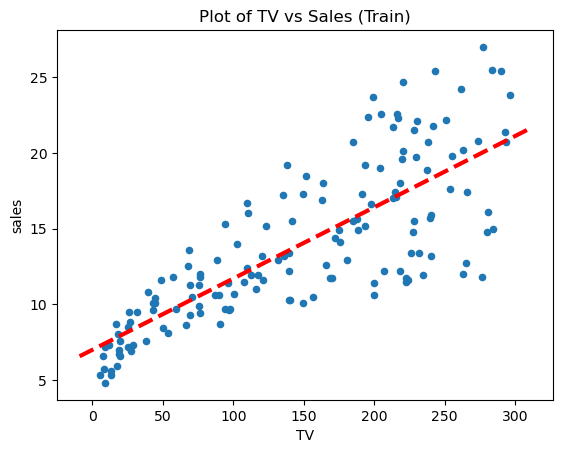

In [15]:
# Plot TV vs sales on training set

ax = Train.plot.scatter('TV', 'sales')
ax.set_title("Plot of TV vs Sales (Train)")
abline(ax,
       results_TV.params[0],
       results_TV.params[1],
       'r--',
       linewidth=3)

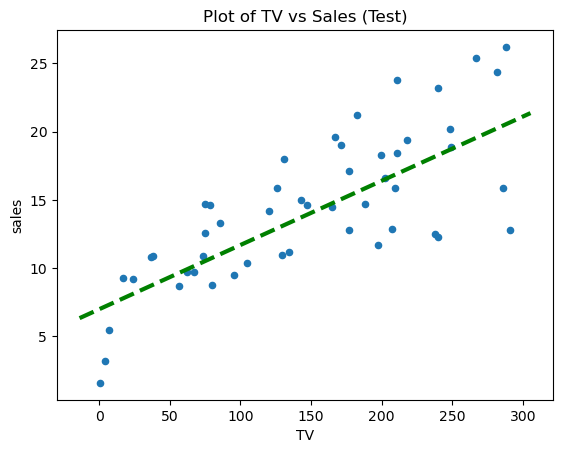

In [16]:
# Plot TV vs sales on test set

ax = Test.plot.scatter('TV', 'sales')
ax.set_title("Plot of TV vs Sales (Test)")
abline(ax,
       results_TV.params[0],
       results_TV.params[1],
       'g--',
       linewidth=3)

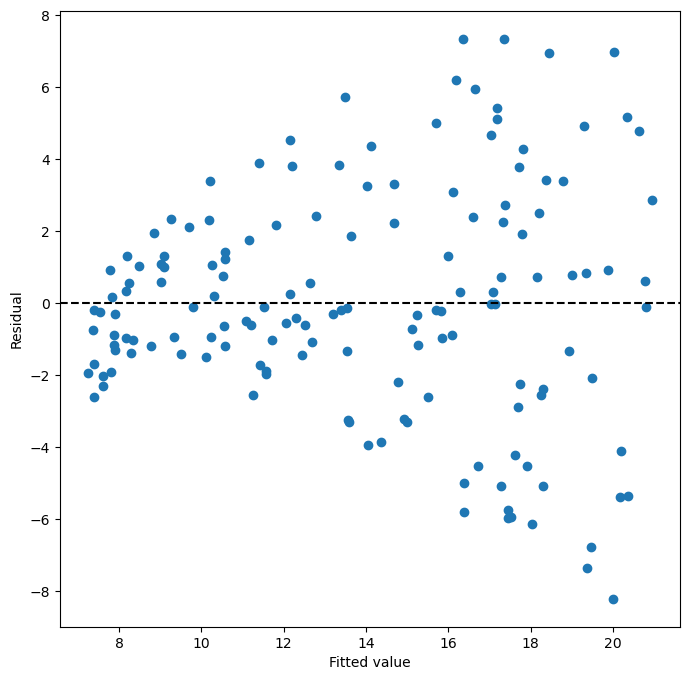

In [17]:
# Plot residual error for train set

ax = subplots(figsize=(8,8))[1]
ax.scatter(predictions_TV_train, y_train-predictions_TV_train)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

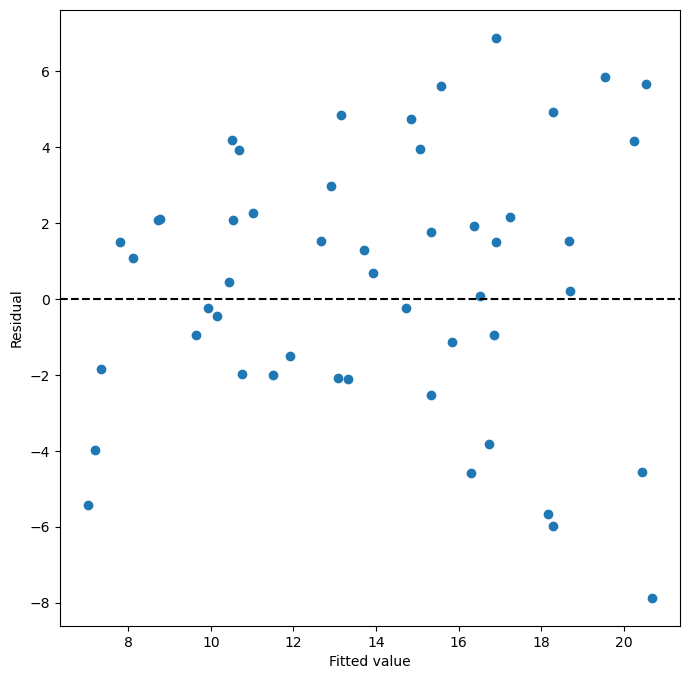

In [18]:
# Plot residual error for test set

ax = subplots(figsize=(8,8))[1]
ax.scatter(predictions_TV_test, y_test-predictions_TV_test)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

## Simple Linear Regression, Example 2

In [19]:
# Build a linear model where radio predicts sales

model_radio = sm.OLS(y_train, X_train[['intercept','radio']])
results_radio = model_radio.fit()
summarize(results_radio)

,coef,std err,t,P>|t|
intercept,9.1138,0.621,14.670,0.0
radio,0.2131,0.023,9.168,0.0


In [20]:
# R^2 for radio model
print('R^2 on train:',results_radio.rsquared)

R^2 on train: 0.3622134728975631


In [21]:
# MSE for radio model

predictions_radio_train = predict(X_train[['intercept', 'radio']], results_radio)
print('mse train:',mse(y_train, predictions_radio_train))
predictions_radio_test = predict(X_test[['intercept', 'radio']], results_radio)
print('mse test:',mse(y_test, predictions_radio_test))

mse train: 16.954810738736672
mse test: 21.614329044169963


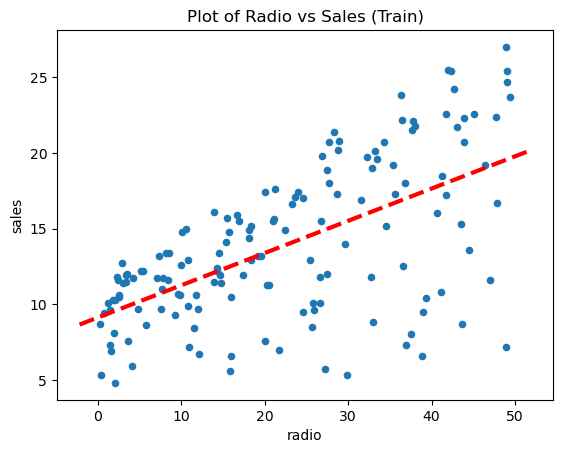

In [22]:
# Plot radio vs sales on training set

ax = Train.plot.scatter('radio', 'sales')
ax.set_title("Plot of Radio vs Sales (Train)")
abline(ax,
       results_radio.params[0],
       results_radio.params[1],
       'r--',
       linewidth=3)

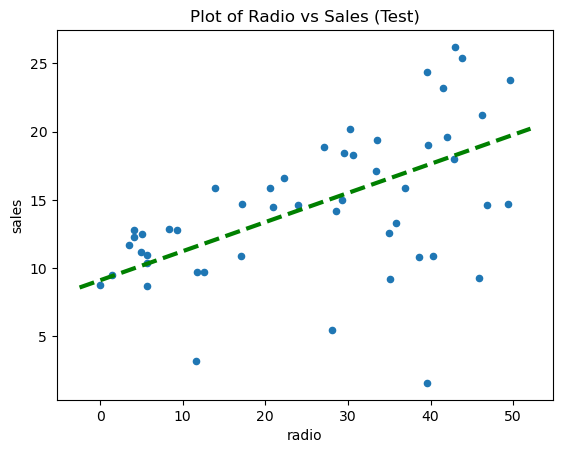

In [23]:
# Plot radio vs sales on test set

ax = Test.plot.scatter('radio', 'sales')
ax.set_title("Plot of Radio vs Sales (Test)")
abline(ax,
       results_radio.params[0],
       results_radio.params[1],
       'g--',
       linewidth=3)

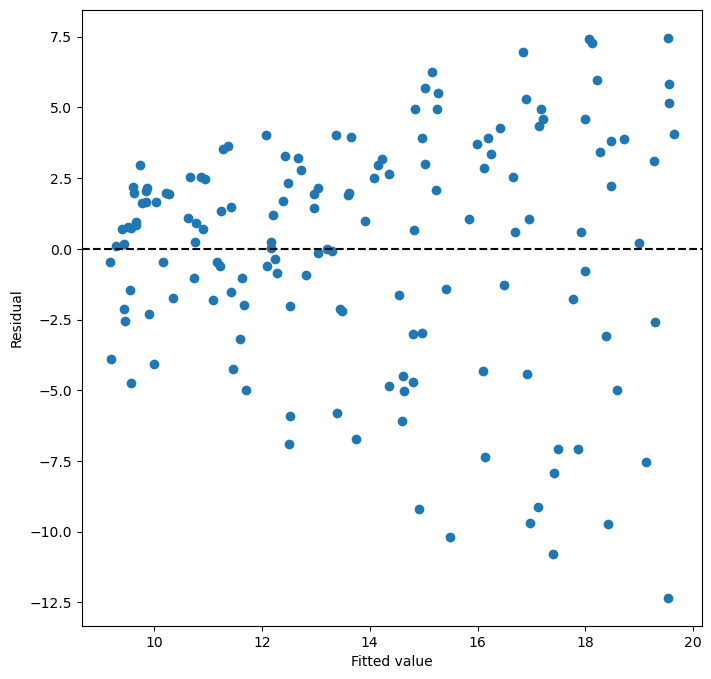

In [24]:
# Plot residual error for training set

ax = subplots(figsize=(8,8))[1]
ax.scatter(predictions_radio_train, y_train-predictions_radio_train)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

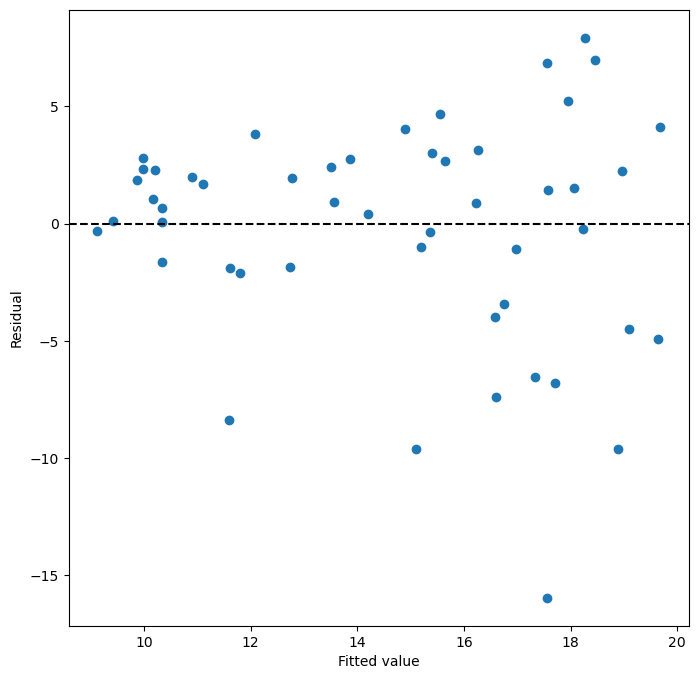

In [25]:
# Plot residual error for test set

ax = subplots(figsize=(8,8))[1]
ax.scatter(predictions_radio_test, y_test-predictions_radio_test)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

## Simple Linear Regression, Example 3

In [26]:
# Build a linear model where newspaper predicts sales

model_newspaper = sm.OLS(y_train, X_train[['intercept','newspaper']])
results_newspaper = model_newspaper.fit()
summarize(results_newspaper)

,coef,std err,t,P>|t|
intercept,12.1253,0.706,17.187,0.000
newspaper,0.0573,0.019,3.077,0.002


In [27]:
# R^2 for newspaper model

print('R^2 on train:',results_newspaper.rsquared)

R^2 on train: 0.06012270409536136


In [28]:
# MSE for newspaper model

predictions_newspaper_train = predict(X_train[['intercept','newspaper']], results_newspaper)
print('mse train:',mse(y_train, predictions_newspaper_train))
predictions_newspaper_test = predict(X_test[['intercept','newspaper']], results_newspaper)
print('mse test:',mse(y_test, predictions_newspaper_test))

mse train: 24.985541388112924
mse test: 27.838263311750378


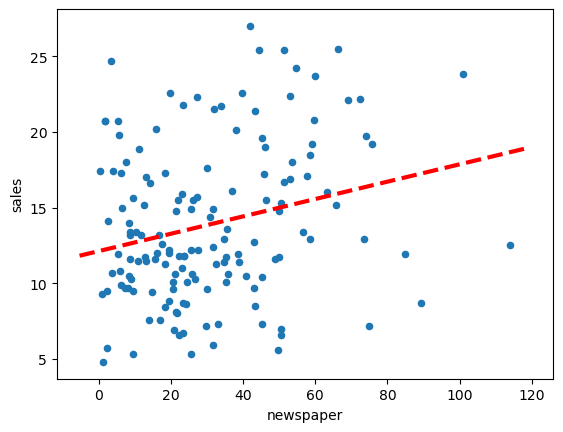

In [29]:
# Plot newspaper vs sales

ax = Train.plot.scatter('newspaper', 'sales')
abline(ax,
       results_newspaper.params[0],
       results_newspaper.params[1],
       'r--',
       linewidth=3)

## Multiple Linear Regression

In [30]:
# Let's remind ourselves the correlation between TV and radio

Train[['TV','radio']].corr()

,TV,radio
TV,1.000000,0.086019
radio,0.086019,1.000000


In [31]:
# Build a linear model with both TV and radio as predictors of sales

model_both = sm.OLS(y_train, X_train[['intercept','TV','radio']])
results_both = model_both.fit()
print(summarize(results_both))

             coef  std err       t  P>|t|
intercept  3.1270    0.310  10.088    0.0
TV         0.0443    0.001  29.710    0.0
radio      0.1905    0.009  21.537    0.0


In [32]:
# Let's remind ourselves what the parameters were when we fit TV and radio separately

print(summarize(results_TV))
print('')
print(summarize(results_radio))

             coef  std err       t  P>|t|
intercept  6.9916    0.513  13.616    0.0
TV         0.0471    0.003  15.594    0.0

             coef  std err       t  P>|t|
intercept  9.1138    0.621  14.670    0.0
radio      0.2131    0.023   9.168    0.0


In [33]:
# R^2 

print('R^2 on train:',results_both.rsquared)

R^2 on train: 0.9089500345708295


In [34]:
# MSE

predictions_both_train = predict(X_train[['intercept','TV','radio']], results_both)
print('mse train:',mse(y_train, predictions_both_train))
predictions_both_test = predict(X_test[['intercept','TV','radio']], results_both)
print('mse test:',mse(y_test, predictions_both_test))

mse train: 2.420457105974833
mse test: 3.952939162565716


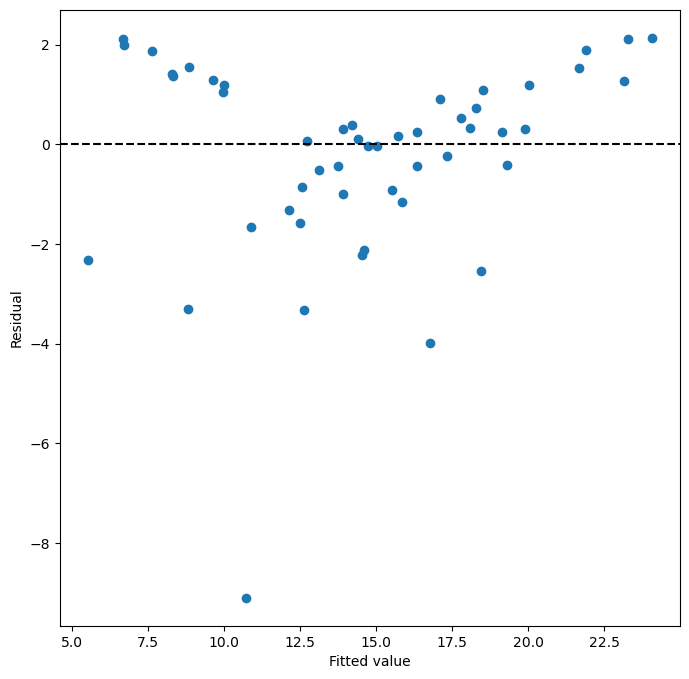

In [35]:
# Plot residual error for test set

ax = subplots(figsize=(8,8))[1]
ax.scatter(predictions_both_test, y_test-predictions_both_test)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

## An example of overfitting via too many predictors

In [36]:
# What were the correlations among newspaper, TV, and radio?

Train[['TV','radio','newspaper']].corr()

,TV,radio,newspaper
TV,1.000000,0.086019,0.112012
radio,0.086019,1.000000,0.324168
newspaper,0.112012,0.324168,1.000000


In [37]:
# Try building a model where TV, radio, and newspaper all predict sales

model_three = sm.OLS(y_train, X_train[['intercept','TV', 'radio', 'newspaper']])
results_three = model_three.fit()
summarize(results_three)

,coef,std err,t,P>|t|
intercept,3.1817,0.328,9.707,0.000
TV,0.0444,0.002,29.566,0.000
radio,0.1921,0.009,20.538,0.000
newspaper,-0.0032,0.006,-0.525,0.601


In [38]:
# R^2

print('R^2 on train:',results_three.rsquared)

R^2 on train: 0.90912141241667


In [39]:
# MSE for "all-three" model

predictions_three_train = predict(X_train[['intercept','TV','radio','newspaper']], results_three)
print('mse train:',mse(y_train, predictions_three_train))
predictions_three_test = predict(X_test[['intercept','TV','radio','newspaper']], results_three)
print('mse test:',mse(y_test, predictions_three_test))

mse train: 2.4159012258839816
mse test: 3.9700817372459265


In [40]:
# For comparison, here were the MSEs for the model with just TV and radio

print('mse train:',mse(y_train, predictions_both_train))
print('mse test:',mse(y_test, predictions_both_test))

mse train: 2.420457105974833
mse test: 3.952939162565716


### An Example with Interactions

In [41]:
# We'll create a model that uses TV, radio, and the interaction of the two to predict sales.
# First we need to create the interaction variable and add it to all of the sets.

X_train['TV_radio_int'] = X_train['TV'] * X_train['radio']
X_test['TV_radio_int'] = X_test['TV'] * X_test['radio']
Train['TV_radio_int'] = Train['TV'] * Train['radio']
Test['TV_radio_int'] = Test['TV'] * Test['radio']

In [42]:
# Might as well look at a correlation matrix with the interaction included

X_train[['TV', 'radio', 'TV_radio_int']].corr()

,TV,radio,TV_radio_int
TV,1.000000,0.086019,0.666873
radio,0.086019,1.000000,0.696899
TV_radio_int,0.666873,0.696899,1.000000


In [43]:
# Build a linear model with an interaction term

model_int = sm.OLS(y_train, X_train[['intercept','TV', 'radio', 'TV_radio_int']])
results_int = model_int.fit()
summarize(results_int)

,coef,std err,t,P>|t|
intercept,6.7089,0.236000,28.459,0.0
TV,0.0192,0.001000,13.352,0.0
radio,0.0338,0.009000,3.810,0.0
TV_radio_int,0.0011,0.000052,20.479,0.0


In [44]:
# R^2 for interaction model

print('R^2 on train:',results_int.rsquared)

R^2 on train: 0.9764880444051811


In [45]:
# MSE for interaction model

predictions_int_train = predict(X_train[['intercept','TV','radio','TV_radio_int']], results_int)
print('mse train:',mse(y_train, predictions_int_train))
predictions_int_test = predict(X_test[['intercept','TV','radio','TV_radio_int']], results_int)
print('mse test:',mse(y_test, predictions_int_test))

mse train: 0.6250379088733999
mse test: 1.6265266164092937


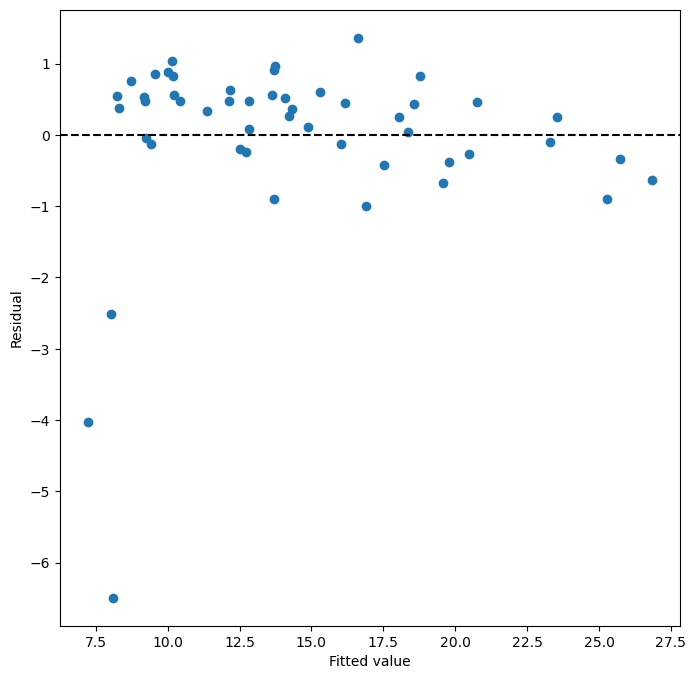

In [46]:
# Plot residual error for test set

ax = subplots(figsize=(8,8))[1]
ax.scatter(predictions_int_test, y_test-predictions_int_test)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

### One last example: categorical variables

In [47]:
# Since this particular set doesn't have any categorical variables in it, let's create one artificially
# Let's create a variable that uses the TV data but only takes on values "high" or "low"

X_train['TV_cat'] = pd.Series(np.zeros(X_train.shape[0]))
X_train.loc[X_train['TV']<=30, 'TV_cat'] = "low"
X_train.loc[X_train['TV']>30, 'TV_cat'] = "high"

In [48]:
# Quick spot check...

X_train.head()

,TV,radio,newspaper,intercept,TV_radio_int,TV_cat
178,276.7,2.3,23.7,1.0,636.41,high
167,206.8,5.2,19.4,1.0,1075.36,high
116,139.2,14.3,25.6,1.0,1990.56,high
76,27.5,1.6,20.7,1.0,44.00,low
11,214.7,24.0,4.0,1.0,5152.80,high


In [49]:
# Build a linear model with a categorical variable

model_cat = sm.OLS(y_train, X_train[['intercept','radio', 'TV_cat']])
results_cat = model_cat.fit()
summarize(results_cat)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [50]:
# We'll need to create a numeric variable to represent each category

X_train['TV_low'] = pd.Series(np.zeros(X_train.shape[0]))
X_train.loc[X_train['TV']<=30, 'TV_low'] = 1
X_train.loc[X_train['TV']>30, 'TV_low'] = 0

X_train['TV_high'] = pd.Series(np.zeros(X_train.shape[0]))
X_train.loc[X_train['TV']<=30, 'TV_high'] = 0
X_train.loc[X_train['TV']>30, 'TV_high'] = 1

In [51]:
X_train.head()

,TV,radio,newspaper,intercept,TV_radio_int,TV_cat,TV_low,TV_high
178,276.7,2.3,23.7,1.0,636.41,high,0.0,1.0
167,206.8,5.2,19.4,1.0,1075.36,high,0.0,1.0
116,139.2,14.3,25.6,1.0,1990.56,high,0.0,1.0
76,27.5,1.6,20.7,1.0,44.00,low,1.0,0.0
11,214.7,24.0,4.0,1.0,5152.80,high,0.0,1.0


In [52]:
# Look at correlations 

X_train[['radio', 'TV_high', 'TV_low']].corr()

,radio,TV_high,TV_low
radio,1.00000,0.00435,-0.00435
TV_high,0.00435,1.00000,-1.00000
TV_low,-0.00435,-1.00000,1.00000


In [53]:
# Fit the model with just the 'TV_low' indicator

model_cat = sm.OLS(y_train, X_train[['intercept','radio','TV_low']])
results_cat = model_cat.fit()
summarize(results_cat)

,coef,std err,t,P>|t|
intercept,10.2524,0.472,21.733,0.0
radio,0.2123,0.017,12.323,0.0
TV_low,-8.0006,0.723,-11.068,0.0


In [54]:
# R^2

print('R^2 on train:',results_cat.rsquared)

R^2 on train: 0.6521094575491346


In [55]:
# MSE for model w/ categorical variable

predictions_cat_train = predict(X_train[['intercept','radio','TV_low']], results_cat)
print('mse train:',mse(y_train, predictions_cat_train))

mse train: 9.248264198756731


In [56]:
# What if we used the 'TV_high' indicator instead of 'TV_low'?

model_cat2 = sm.OLS(y_train, X_train[['intercept','radio', 'TV_high']])
results_cat2 = model_cat2.fit()
summarize(results_cat2)

,coef,std err,t,P>|t|
intercept,2.2519,0.772,2.916,0.004
radio,0.2123,0.017,12.323,0.000
TV_high,8.0006,0.723,11.068,0.000


In [ ]:
# For comparison, these were the estimates for the 'TV_low' model

summarize(results_cat)

In [57]:
# R^2

print('train R^2 for TV_high model:',results_cat2.rsquared)
print('train R^2 for TV_low model:',results_cat.rsquared)

train R^2 for TV_high model: 0.6521094575491346
train R^2 for TV_low model: 0.6521094575491346


In [58]:
# MSE on train

predictions_cat2_train = predict(X_train[['intercept','radio','TV_high']], results_cat2)
print('mse train for TV_high:',mse(y_train, predictions_cat2_train))
print('mse train for TV_low:',mse(y_train, predictions_cat_train))

mse train for TV_high: 9.248264198756727
mse train for TV_low: 9.248264198756731
